## Spatial Autocorrelation with CitiBike Data

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import os

In [173]:
from geopandas import GeoDataFrame
PUIdata = os.getenv('PUIDATA')

# os.system('wget -r -np https://github.com/fedhere/PUI2016_fb55/raw/master/Lab9_SRK325/Data/ -P ' + 
#           PUIdata + '/Geopandas_HW/')
# for i in extensions:
#     os.system('curl -O https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/Lab9_SRK325/Data/CT_Shape/ct_shape.' 
#               + i)
#     os.system('mv ct_shape.' + i + ' ' + PUIdata + '/Geopandas_HW/') 
# for i in csvs:
#     os.system('curl -O https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/Lab9_SRK325/Data/' 
#               + i + '.csv')
#     os.system('mv ' + i + '.csv ' + PUIdata + '/Geopandas_HW/') 

In [174]:
# shape_path = PUIdata + "/Geopandas_HW/ct_shape.shp"
shape_path = 'Data/CT_Shape/ct_shape.shp'
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index = ct_shape.BoroCT2010

In [175]:
ct_shape.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
BoroCT2010,,,,,,,,,,,,
5000900,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016729,POLYGON ((-74.07920577013245 40.64343078374566...
5012500,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4.954936e+06,10582.855530,POLYGON ((-74.11618948747538 40.62894119691981...
5013301,5013301,5,Staten Island,E,013301,133.01,SI22,West New Brighton-New Brighton-St. George,3903,7.217847e+05,3428.312676,POLYGON ((-74.11719947139957 40.63456809812987...
5019700,5019700,5,Staten Island,I,019700,197,SI07,Westerleigh,3903,3.231720e+06,9097.697226,POLYGON ((-74.13122302263596 40.61726518212697...
5002002,5002002,5,Staten Island,I,002002,20.02,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,8.501224e+06,12591.725901,"POLYGON ((-74.0635056566019 40.60215005483046,..."


In [176]:
from fiona.crs import from_epsg
ct_shape.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
NYC_Area = ct_shape.to_crs(epsg=2263).geometry.area.sum()/(2.788*10**7) # from ft2 to mi2 
# print 'total NYC land area: %s (mi^2)'%str(NYC_Area)[:5] # from ft2 to mi2 #epsg=2263 is US feet

In [177]:
# ct_data = pd.DataFrame.from_csv(PUIdata + '/Geopandas_HW/ACS_CT2010.csv')
ct_data = pd.DataFrame.from_csv('Data/ACS_CT2010.csv')

# set index to be the BoroCT2010 code
ct_data.index = ct_data.BoroCT2010.astype(str)

In [178]:
# df_bike_monthly = pd.DataFrame.from_csv(PUIdata + '/Geopandas_HW/CitiBike_monthly_byStation.csv')
df_bike_monthly = pd.DataFrame.from_csv('Data/CitiBike_monthly_byStation.csv')
df_bike_monthly.head()

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,2878,5258,9814,3739,7837,3206,2747,3590,4618,2885,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,2920,4409,10456,3520,8928,3237,2530,3909,4169,2542,...,0,0,0,0,0,0,0,0,0,0
2013-11-30,1883,2731,6384,2446,5201,2085,1415,2727,3146,1539,...,0,0,0,0,0,0,0,0,0,0


In [179]:
# Split the data into two seasons
# Winter = October through March, Summer = April through September
#@Review: seasonal decomposition for summer and winter???
summer_mask = (df_bike_monthly.index.month > 3) & (df_bike_monthly.index.month < 10)
winter_mask = (df_bike_monthly.index.month < 4) | (df_bike_monthly.index.month > 9)
bike_monthly_summer = df_bike_monthly.loc[summer_mask]
bike_monthly_winter = df_bike_monthly.loc[winter_mask]
bike_monthly_winter

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-10-31,2920,4409,10456,3520,8928,3237,2530,3909,4169,2542,...,0,0,0,0,0,0,0,0,0,0
2013-11-30,1883,2731,6384,2446,5201,2085,1415,2727,3146,1539,...,0,0,0,0,0,0,0,0,0,0
2013-12-31,1299,1650,4081,1686,3046,1575,830,1890,2048,1009,...,0,0,0,0,0,0,0,0,0,0
2014-01-31,956,1337,3178,1251,1920,1130,477,1412,1082,681,...,0,0,0,0,0,0,0,0,0,0
2014-02-28,650,960,2920,676,1808,933,508,1045,963,530,...,0,0,0,0,0,0,0,0,0,0
2014-03-31,804,1559,5102,1441,2643,1477,849,2004,2105,880,...,0,0,0,0,0,0,0,0,0,0
2014-10-31,2213,3121,8881,3268,6624,4106,1798,3989,3270,2193,...,0,0,0,0,0,0,0,0,0,0
2014-11-30,1437,1863,5980,2339,4069,2836,1148,2584,2109,1399,...,0,0,0,0,0,0,0,0,0,0
2014-12-31,1052,1304,4501,1783,2985,2091,779,2108,1636,878,...,0,0,0,0,0,0,0,0,0,0


In [180]:
# station_id = pd.DataFrame.from_csv(PUIdata + '/Geopandas_HW/Station_id.csv')
station_id = pd.DataFrame.from_csv('Data/Station_id.csv')

# convert station_ids to string index
station_id.index = station_id.index.astype(str)
station_id.head()

,lat,lon
1000,40.753231,-73.970325
1001,40.749718,-74.002950
1002,40.730287,-73.990765
1003,40.718939,-73.992663
1004,40.734927,-73.992005


In [181]:
import shapely

# combine lat and lon to one column
station_id['lonlat'] = zip(station_id.lon, station_id.lat)

# Create Point Geometry for stations based on lonlat column
station_id['geometry'] = station_id[['lonlat']].applymap(lambda x: shapely.geometry.Point(x))
station_id.head()

,lat,lon,lonlat,geometry
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098)
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753)
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666)
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904)
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695)


In [182]:
a = []
# check for each citibike station to see what CT they belong to
for i in range(len(station_id)):
    a.append(ct_shape[ct_shape.geometry.intersects(station_id.iloc[i].geometry)].BoroCT2010.values[0])
    print '\r',"%",str((i+1)*100./len(station_id))[:4],
station_id['BoroCT2010'] = a

% 100.


In [183]:
station_id.BoroCT2010.head()

1000    1009000
1001    1009900
1002    1005700
1003    1001800
1004    1006100
Name: BoroCT2010, dtype: object

In [184]:
# Sum the monthly rides for each station, for winter and summer separately
# Add it to station_id dataframe which has the geometry
station_id['MonthlyAve'] = df_bike_monthly.sum()
station_id.head()

station_id['MonthlyAve_winter'] = bike_monthly_winter.sum()
station_id['MonthlyAve_summer'] = bike_monthly_summer.sum()
station_id.head()

,lat,lon,lonlat,geometry,BoroCT2010,MonthlyAve,MonthlyAve_winter,MonthlyAve_summer
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098),1009000,69308,26930,42378
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753),1009900,102824,35178,67646
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666),1005700,273525,104440,169085
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904),1001800,101949,37865,64084
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695),1006100,184044,67720,116324


In [185]:
temp = station_id[['MonthlyAve_summer', 'MonthlyAve_winter']]
temp['station_id'] = station_id.index
temp.index = station_id['BoroCT2010']
temp.head()

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,MonthlyAve_summer,MonthlyAve_winter,station_id
BoroCT2010,,,
1009000,42378,26930,1000
1009900,67646,35178,1001
1005700,169085,104440,1002
1001800,64084,37865,1003
1006100,116324,67720,1004


In [186]:
# Join all the necessary data
ct_shape_MonthlyAvgs = ct_shape.join(temp)
ct_shape_MonthlyAvgs.fillna(0, inplace=True)

In [187]:
# Zoom for better plotting
ct_shape_MonthlyAvgs_Zoom = (ct_shape_MonthlyAvgs[ct_shape_MonthlyAvgs
                           .centroid
                           .apply(lambda c: c.x > -74.1 and c.x < -73.92 and c.y > 40.65 and c.y < 40.8)])

In [188]:
path = 'Output/ct_shape_MonthlyAvgs_Zoom.shp'
ct_shape_MonthlyAvgs_Zoom.to_file(path)

### Exploring contiguity and spatial lag

In [189]:
import pysal as ps

# Queen weights: shares edge or vertex
qW_CT = ps.queen_from_shapefile(path)

('Island id: ', [0])


In [190]:
print qW_CT[5]
print qW_CT.cardinalities[5]

{6: 1.0, 7: 1.0, 456: 1.0, 459: 1.0, 409: 1.0, 410: 1.0}
6


In [191]:
# Weights matrix
Wmatrix, ids = qW_CT.full()
Wmatrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [192]:
# Row standardization
qW_CT.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')


In [193]:
# Calculating spatial lag for each census tract, summer and winter
MonthlyRides_summer = ct_shape_MonthlyAvgs_Zoom.MonthlyAve_summer
MonthlyRides_winter = ct_shape_MonthlyAvgs_Zoom.MonthlyAve_winter
MonthlyRideLag_summer = ps.lag_spatial(qW_CT, MonthlyRides_summer)
MonthlyRideLag_winter = ps.lag_spatial(qW_CT, MonthlyRides_winter)

In [194]:
# Divide tracts into quantiles
MonthlyRideLagQ10_summer = ps.Quantiles(MonthlyRideLag_summer, k=10)
print MonthlyRideLagQ10_summer
MonthlyRideLagQ10_winter = ps.Quantiles(MonthlyRideLag_winter, k=10)
print MonthlyRideLagQ10_winter

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               140
    0.000 < x[i] <=   137.571                21
  137.571 < x[i] <=  2404.850                78
 2404.850 < x[i] <=  5510.364                80
 5510.364 < x[i] <= 11145.782                79
11145.782 < x[i] <= 16953.467                80
16953.467 < x[i] <= 36421.278                79
36421.278 < x[i] <= 52710.200                80
52710.200 < x[i] <= 61019.750                79
61019.750 < x[i] <= 94018.643                80
                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               159
    0.000 < x[i] <=   100.000                 2
  100.000 < x[i] <=  1652.442                78
 1652.442 < x[i] <=  4131.471                80
 4131.471 < x[i] <=  6582.023                79
 6582.023 < x[i] <=  9880.056                80
 9880.056 < x[i] <= 21830.992       

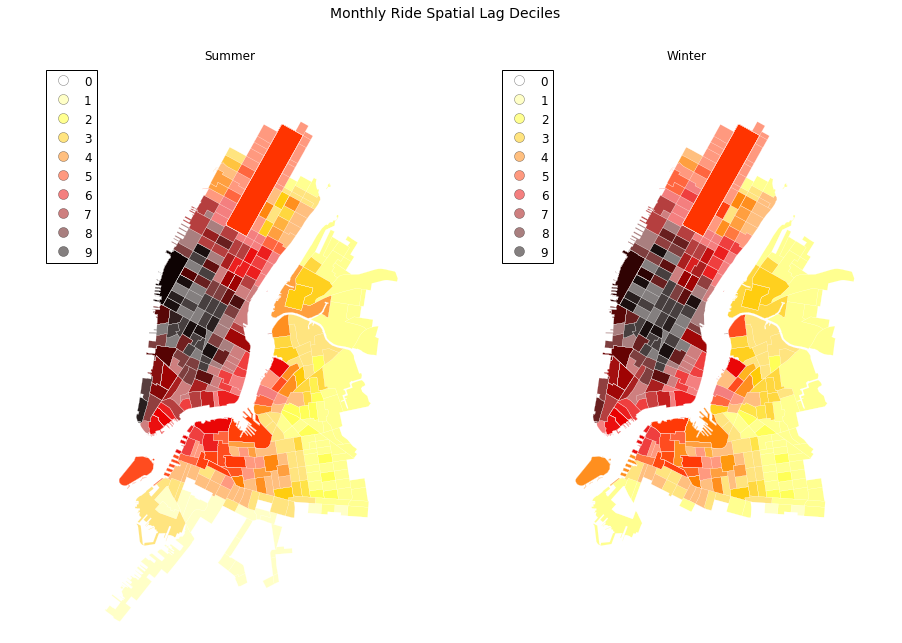

In [195]:
# Map spatial lag for summer and winter
fig = plt.figure(figsize=(15, 10))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

fig.suptitle('Monthly Ride Spatial Lag Deciles', fontsize=14)

ct_shape_MonthlyAvgs_Zoom.assign(cl=MonthlyRideLagQ10_summer.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax1, 
        edgecolor='white', legend=True)
ax1.set_axis_off()
ax1.set_title("Summer")

ct_shape_MonthlyAvgs_Zoom.assign(cl=MonthlyRideLagQ10_winter.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax2, 
        edgecolor='white', legend=True)
ax2.set_axis_off()
ax2.set_title("Winter")


#### Figure 1: Spatial lag for census tracts of interest. Darker is higher.

### Global Spatial Autocorrelation

In [196]:
b_s, a_s = np.polyfit(MonthlyRides_summer, MonthlyRideLag_summer, 1)
b_w, a_w = np.polyfit(MonthlyRides_winter, MonthlyRideLag_winter, 1)
print b_s, a_s
print b_w, a_w

0.64466687635 8128.84426008
0.659622410902 4623.78156251


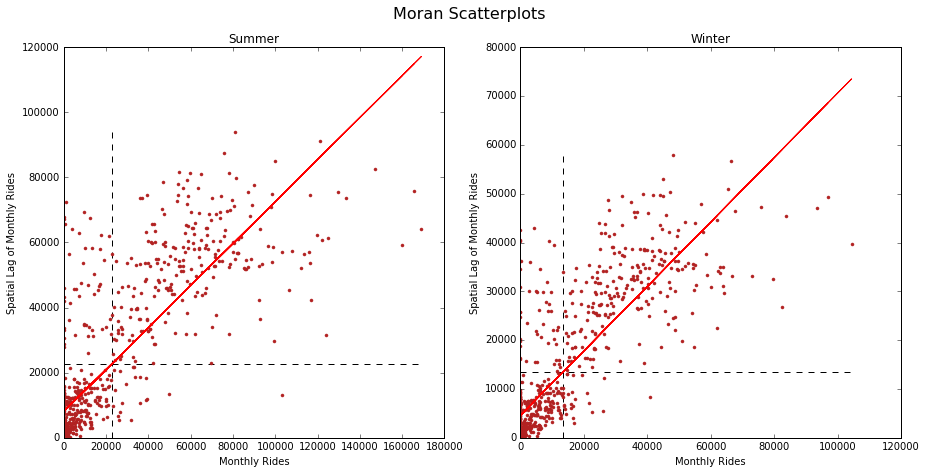

In [197]:
# Moran's scatterplots
fig = plt.figure(figsize=(15, 7))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

ax1.plot(MonthlyRides_summer, MonthlyRideLag_summer, '.', color='firebrick')
ax2.plot(MonthlyRides_winter, MonthlyRideLag_winter, '.', color='firebrick')

fig.suptitle('Moran Scatterplots', fontsize=16)
ax1.set_title('Summer')
ax2.set_title('Winter')

# dashed vert at mean of the last year's PCI - summer
ax1.vlines(MonthlyRides_summer.mean(), MonthlyRideLag_summer.min(), MonthlyRideLag_summer.max(), linestyle='--')
# dashed horizontal at mean of lagged PCI
ax1.hlines(MonthlyRideLag_summer.mean(), MonthlyRides_summer.min(), MonthlyRides_summer.max(), linestyle='--')

# dashed vert at mean of the last year's PCI - winter
ax2.vlines(MonthlyRides_winter.mean(), MonthlyRideLag_winter.min(), MonthlyRideLag_winter.max(), linestyle='--')
# dashed horizontal at mean of lagged PCI
ax2.hlines(MonthlyRideLag_winter.mean(), MonthlyRides_winter.min(), MonthlyRides_winter.max(), linestyle='--')

# red line of best fit using global I as slope
ax1.plot(MonthlyRides_summer, a_s + b_s*MonthlyRides_summer, 'r')
ax2.plot(MonthlyRides_winter, a_w + b_w*MonthlyRides_winter, 'r')

ax1.set_ylabel('Spatial Lag of Monthly Rides')
ax1.set_xlabel('Monthly Rides')
ax2.set_ylabel('Spatial Lag of Monthly Rides')
ax2.set_xlabel('Monthly Rides')

#### Figure 2: Spatial lag plotting against rides, with mean values (dotted lines) and line of best fit (red) with global Moran's I as slope.

In [198]:
# Calculate Moran's I for summer and winter
I_MonthlyRides_summer = ps.Moran(MonthlyRides_summer, qW_CT)
I_MonthlyRides_winter = ps.Moran(MonthlyRides_winter, qW_CT)
print "I-statistic for summer months: " + str(I_MonthlyRides_summer.I)
print "p-value: " + str(I_MonthlyRides_summer.p_sim)
print "I-statistic for winter months: " + str(I_MonthlyRides_winter.I)
print "p-value: " + str(I_MonthlyRides_winter.p_sim)

I-statistic for summer months: 0.644825188485
p-value: 0.001
I-statistic for winter months: 0.659777186107
p-value: 0.001


### Local Spatial Autocorrelation
#### Local indicators of spatial autocorrelation (LISA)

In [199]:
LMo_MonthlyRides_summer = ps.Moran_Local(MonthlyRides_summer, qW_CT, permutations=999)
LMo_MonthlyRides_winter = ps.Moran_Local(MonthlyRides_winter, qW_CT, permutations=999)
print "The first five I-statistics (local to each census tract) and associated p-values"
print "Summer I-stats:", LMo_MonthlyRides_summer.Is[0:5]
print "Summer p-values:", LMo_MonthlyRides_summer.p_sim[0:5]
print "Winter I-stats:", LMo_MonthlyRides_winter.Is[0:5]
print "Winter p-values:", LMo_MonthlyRides_winter.p_sim[0:5]

The first five I-statistics (local to each census tract) and associated p-values
Summer I-stats: [-0.         -0.23934856  0.01170042  0.00166728  0.021779  ]
Summer p-values: [ 0.001  0.171  0.342  0.338  0.372]
Winter I-stats: [-0.         -0.27131052  0.000345   -0.00107098 -0.04975374]
Winter p-values: [ 0.001  0.147  0.485  0.5    0.418]


In [200]:
# Extract tracts with significant and insignificant values for LISA, summer and winter
sigs_s = MonthlyRides_summer[LMo_MonthlyRides_summer.p_sim <= .001]
W_sigs_s = MonthlyRideLag_summer[LMo_MonthlyRides_summer.p_sim <= .001]
insigs_s = MonthlyRides_summer[LMo_MonthlyRides_summer.p_sim > .001]
W_insigs_s = MonthlyRideLag_summer[LMo_MonthlyRides_summer.p_sim > .001]

sigs_w = MonthlyRides_winter[LMo_MonthlyRides_winter.p_sim <= .001]
W_sigs_w = MonthlyRideLag_winter[LMo_MonthlyRides_winter.p_sim <= .001]
insigs_w = MonthlyRides_winter[LMo_MonthlyRides_winter.p_sim > .001]
W_insigs_w = MonthlyRideLag_winter[LMo_MonthlyRides_winter.p_sim > .001]

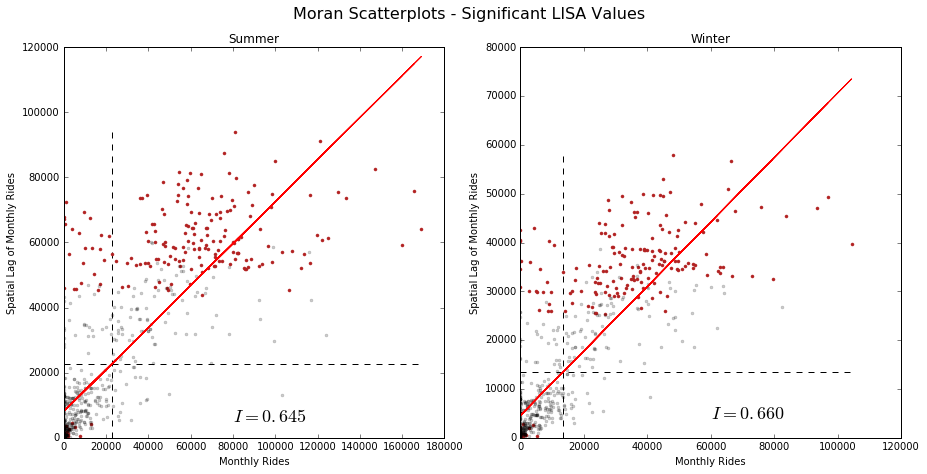

In [201]:
# Plot the Moran scatterplots showing significant LISA values, with global I-statistics
fig = plt.figure(figsize=(15, 7))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

ax1.plot(sigs_s, W_sigs_s, '.', color='firebrick')
ax1.plot(insigs_s, W_insigs_s, '.k', alpha=.2)

ax2.plot(sigs_w, W_sigs_w, '.', color='firebrick')
ax2.plot(insigs_w, W_insigs_w, '.k', alpha=.2)

fig.suptitle('Moran Scatterplots - Significant LISA Values', fontsize=16)
ax1.set_title('Summer')
ax2.set_title('Winter')

# dashed vert at mean of the last year's PCI - summer
ax1.vlines(MonthlyRides_summer.mean(), MonthlyRideLag_summer.min(), MonthlyRideLag_summer.max(), linestyle='--')
# dashed horizontal at mean of lagged PCI
ax1.hlines(MonthlyRideLag_summer.mean(), MonthlyRides_summer.min(), MonthlyRides_summer.max(), linestyle='--')

# dashed vert at mean of the last year's PCI - winter
ax2.vlines(MonthlyRides_winter.mean(), MonthlyRideLag_winter.min(), MonthlyRideLag_winter.max(), linestyle='--')
# dashed horizontal at mean of lagged PCI
ax2.hlines(MonthlyRideLag_winter.mean(), MonthlyRides_winter.min(), MonthlyRides_winter.max(), linestyle='--')

# red line of best fit using global I as slope
ax1.plot(MonthlyRides_summer, a_s + b_s*MonthlyRides_summer, 'r')
ax2.plot(MonthlyRides_winter, a_w + b_w*MonthlyRides_winter, 'r')

# Include respective I-statistics
ax1.text(s='$I = %.3f$' % I_MonthlyRides_summer.I, x=80000, y=5000, fontsize=18)
ax2.text(s='$I = %.3f$' % I_MonthlyRides_winter.I, x=60000, y=4000, fontsize=18)

ax1.set_ylabel('Spatial Lag of Monthly Rides')
ax1.set_xlabel('Monthly Rides')
ax2.set_ylabel('Spatial Lag of Monthly Rides')
ax2.set_xlabel('Monthly Rides')

#### Figure 3: Significant LISA values (in red) plotted for summer and winter months.

### Map hot and cold spots in terms of local spatial autocorrelation

In [202]:
sig_s = LMo_MonthlyRides_summer.p_sim < 0.01
hotspots_s = LMo_MonthlyRides_summer.q==1 * sig_s
coldspots_s = LMo_MonthlyRides_summer.q==3 * sig_s

sig_w = LMo_MonthlyRides_winter.p_sim < 0.01
hotspots_w = LMo_MonthlyRides_winter.q==1 * sig_w
coldspots_w = LMo_MonthlyRides_winter.q==3 * sig_w

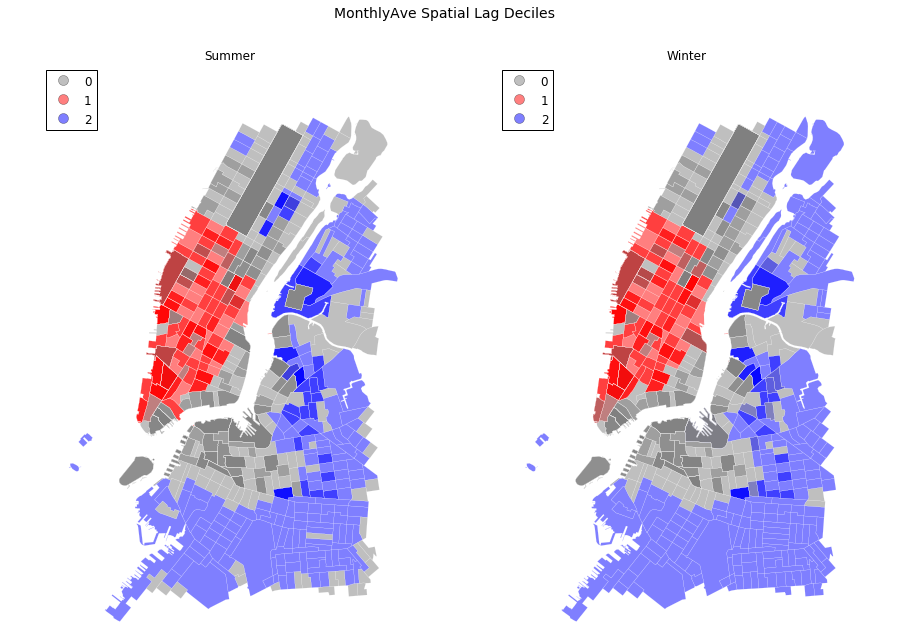

In [203]:
from matplotlib import colors

hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold_s = hotspots_s*1 + coldspots_s*2
hotcold_w = hotspots_w*1 + coldspots_w*2

fig = plt.figure(figsize=(15, 10))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

fig.suptitle('MonthlyAve Spatial Lag Deciles', fontsize=14)

ct_shape_MonthlyAvgs_Zoom.assign(cl=hotcold_s).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax1, 
        edgecolor='white', legend=True)
ax1.set_axis_off()
ax1.set_title("Summer")

ct_shape_MonthlyAvgs_Zoom.assign(cl=hotcold_w).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax2, 
        edgecolor='white', legend=True)
ax2.set_axis_off()
ax2.set_title("Winter")


#### Figure 4: Hot (high) and cold (low) census tracts in terms of local spatial autocorrelation.